# Lab 12 - Wprowadzenie do sztucznych sieci neuronowych

Sieć neuronowa to system (funkcja) przeznaczony do przetwarzania informacji, który pierwotnie (lata 50. XX w) był wzorowany na ludzkim układzie nerwowym. Wyróżniającą cechą sieci neuronowej jest możliwość automatycznego rozwiązywania przy jej pomocy rzeczywistych problemów bez ich uprzedniej matematycznej formalizacji. Dalszą zaletą jest brak konieczności odwoływania się przy stosowaniu sieci do jakichkolwiek teoretycznych założeń na temat rozwiązywanego problemu. Najbardziej znamienną cechą sieci neuronowej jest jej zdolność uczenia się na podstawie przykładów i możliwość uogólniania zdobytej wiedzy (generalizacja wyników na populację).

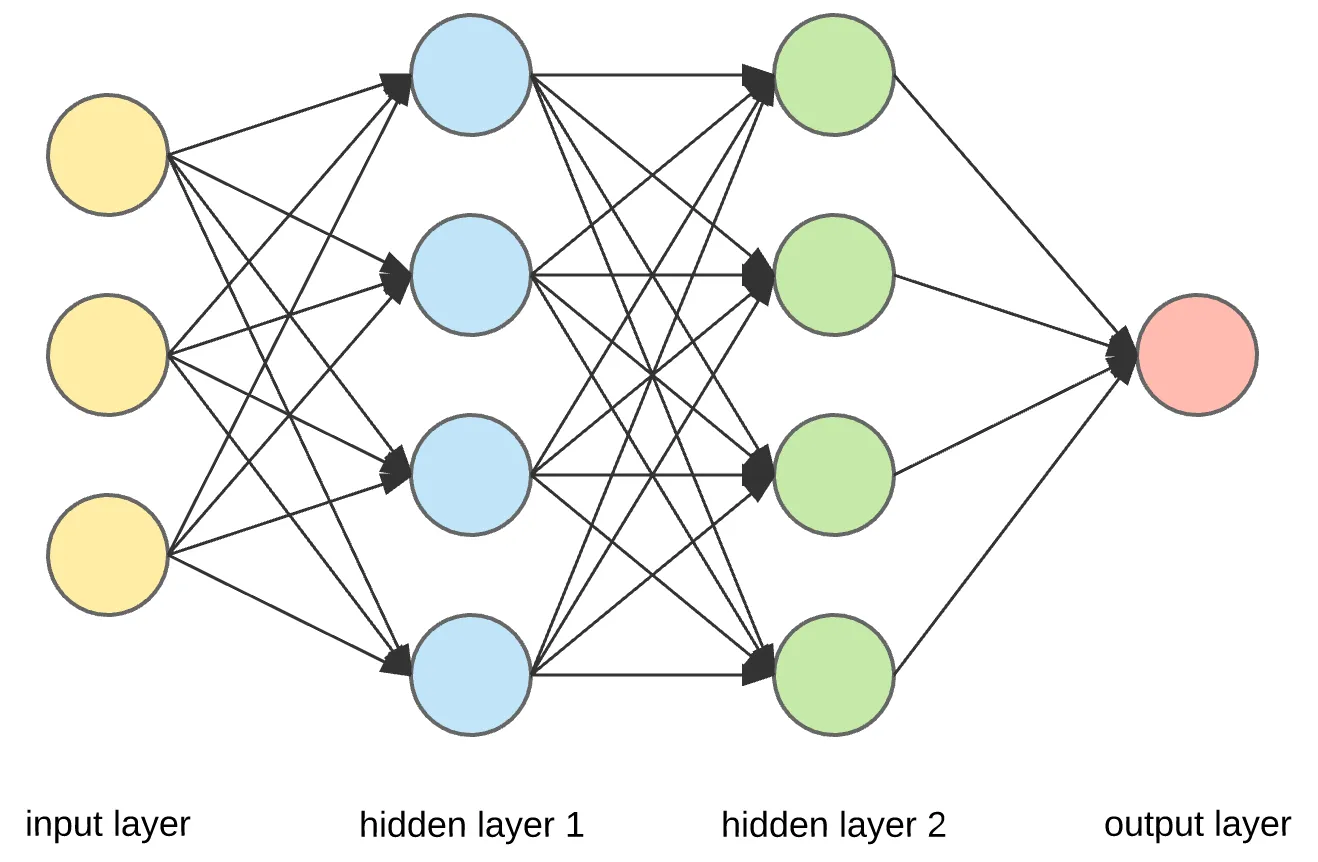

Podstawę działania sieci neuronowej stanowi pojedynczy neuron będący najmniejszą jednostką, z jakich składa się sieć. Jego działanie polega na wyznaczeniu kombinacji liniowej wartości wejściowych ($x$) wraz z wagami znajdującymi się na jego wejściu ($w$, synapsy) oraz transformacja wyniku za pomocą opcjonalnej nieliniowej funkcji aktywacji ($z$):

$y_1 = z(\sum_{i=1}^n x_i w_i + b) = z(x^Tw + b)$

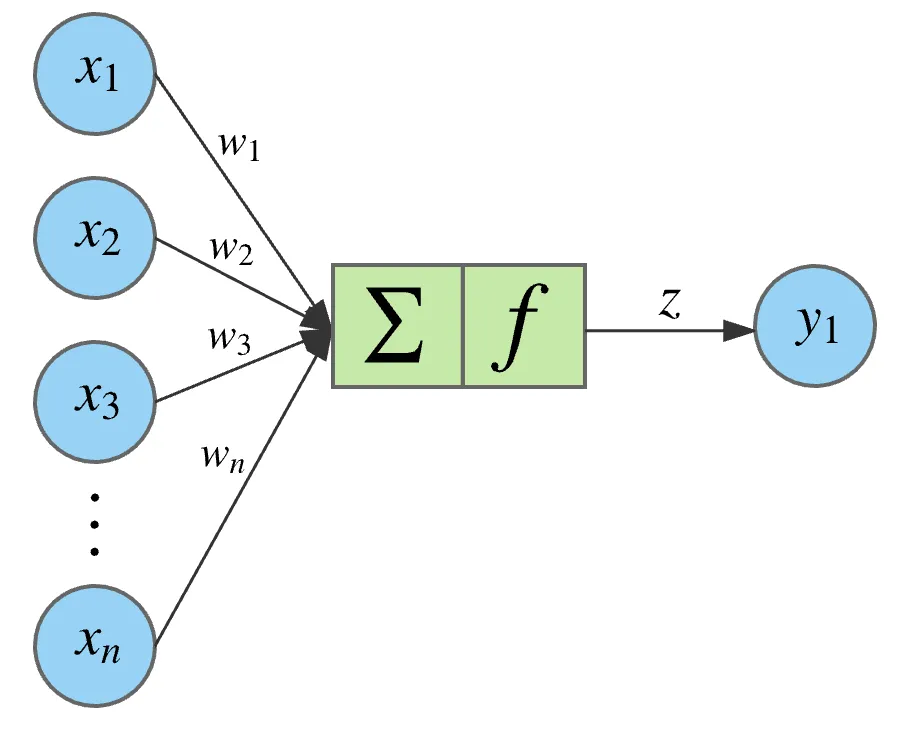

Spośród funkcji aktywacji popularne w użyciu są:
- ReLU (rectified linear unit): $z(x) = max(0, z)$
- Sigmoid: $z(x) = \frac{1}{1 + e^{-x}} $
- Softmax: $z(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}} $ dla i=1, 2, ..., K

Do uczenia sieci neuronowej przeznaczona jest algorytm propagacji wstecznej wykorzystujący wybrane optymalizatory. Jego zasada działania polega wielokrotnym iteracyjnym na pomiarze błędu predykcji przydzielanych przez sieć, a następnie na korekcji wag:

$W_i = W_i - \alpha \times (\frac{\delta D}{\delta \hat{y}} (\hat{y}, y) \times ... \times \frac{\delta A}{\delta M_i} (O_i, w_{i+1}) \times \frac{\delta A}{\delta M_i} (N_i) \times \frac{\delta A}{\delta M_i} (M_i, B_i) \times \frac{\delta V}{\delta W_i} (X_i, W_i))$

$B_i = B_i - \alpha \times (\frac{\delta D}{\delta \hat{y}} (\hat{y}, y) \times ... \times \frac{\delta A}{\delta M_i} (O_i, w_{i+1}) \times \frac{\delta A}{\delta M_i} (N_i) \times \frac{\delta A}{\delta B_i} (M_i, B_i))$

gdzie:
- $M$ - wartość wewnętrzna neuronu (kombinacja liniowa)
- $V$ - wynik poszczególnego neuronu
- $X$ - wejście neuronu
- $W$ - wagi neuronu
- $A$ - funkcja zwracająca kombinację aktywacji i neuronu obciążenia
- $O$ - wyjście warstwy
- $D$ - funkcja straty

## Implementacja sieci neuronowej za pomocą biblioteki Tensorflow

Tensorflow (https://www.tensorflow.org/?hl=en) to jedna z najpopularniejszych bibliotek (a nawet framework) do budowy, treningu, wykorzystania i wdrażania sieci neuronowych, zawierający także narzędzia do przetwarzania danych.

Przykład będzie dotyczył klasyfikaji wina:
- białe / niebiałe
- dobre / niedobre

In [ ]:
dataset_path = '/content/winequalityN.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
df = pd.read_csv(dataset_path)
df.sample(5)

### Przygotowanie danych

In [ ]:
df.isna().sum()

In [ ]:
df = df.dropna()
df.isna().sum()

In [ ]:
df['is_white_wine'] = [1 if typ == 'white' else 0 for typ in df['type']]

In [ ]:
df.head()

In [ ]:
df['is_good_wine'] = [1 if quality >= 6 else 0 for quality in df['quality']]
df.drop('quality', axis=1, inplace=True)
df.drop('type', axis=1, inplace=True)

In [ ]:
df.head()

### Podział danych na zbiory treningowy oraz testowy

In [ ]:
X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
y_train

### Normalizacja danych

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

### Sieć neuronowa

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
    ],
)

In [ ]:
model.build(X_train_scaled.shape)

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True)

#### Trening

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50)

### Wizualizacja efektów treningu

In [ ]:
rcParams['figure.figsize'] = (18, 8)

plt.plot(
    np.arange(1, 51),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 51),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 51),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 51),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

### Predykcje dla danych testowych

In [ ]:
predictions = model.predict(X_test_scaled)

In [ ]:
predictions

## Zadania

1. Sprawdzić wydajność sieci neuronowej dla zbioru danych z labu 11 oraz porównać wyniki z lasem losowym.